### This file is used to create the model represent the image of each item in our dataset as a vector of length 16.

#### Read user and item csv files

In [1]:
import pandas as pd
import gzip
from PIL import Image
from PIL import ImageOps
import urllib.request as urllib
import urllib.error as err

import io
import numpy as np

def parse(path):
    g = gzip.open(path, 'rb')
    for line in g:
        yield eval(line)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

df = getDF('reviews_Clothing_Shoes_and_Jewelry_5.json.gz')

In [2]:
df.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1KLRMWW2FWPL4,0000031887,"Amazon Customer ""cameramom""","[0, 0]",This is a great tutu and at a really great pri...,5.0,Great tutu- not cheaply made,1297468800,"02 12, 2011"
1,A2G5TCU2WDFZ65,0000031887,Amazon Customer,"[0, 0]",I bought this for my 4 yr old daughter for dan...,5.0,Very Cute!!,1358553600,"01 19, 2013"
2,A1RLQXYNCMWRWN,0000031887,Carola,"[0, 0]",What can I say... my daughters have it in oran...,5.0,I have buy more than one,1357257600,"01 4, 2013"
3,A8U3FAMSJVHS5,0000031887,Caromcg,"[0, 0]","We bought several tutus at once, and they are ...",5.0,"Adorable, Sturdy",1398556800,"04 27, 2014"
4,A3GEOILWLK86XM,0000031887,CJ,"[0, 0]",Thank you Halo Heaven great product for Little...,5.0,Grammy's Angels Love it,1394841600,"03 15, 2014"
5,A27UF1MSF3DB2,0000031887,"C-Lo ""Cynthia""","[0, 0]",I received this today and I'm not a fan of it ...,4.0,It's ok,1396224000,"03 31, 2014"
6,A16GFPNVF4Y816,0000031887,design maven,"[0, 0]",Bought this as a backup to the regular ballet ...,5.0,Great for dress-up and for ballet practice,1399075200,"05 3, 2014"
7,A2M2APVYIB2U6K,0000031887,Jamie P.,"[0, 0]",Great tutu for a great price. It isn't a &#34;...,5.0,Great value,1356220800,"12 23, 2012"
8,A1NJ71X3YPQNQ9,0000031887,JBerger,"[0, 0]","My daughter liked this, and it with her costum...",4.0,Good,1384041600,"11 10, 2013"
9,A3EERSWHAI6SO,0000031887,"Jeffrey Hollingshead ""Jillian hollingshead""","[7, 8]",For what I paid for two tutus is unbeatable an...,5.0,WOW !! ..is all I have to say!,1349568000,"10 7, 2012"


In [3]:
import pandas as pd
import gzip

def parse(path):
    g = gzip.open(path, 'rb')
    for line in g:
        yield eval(line)

def getDF(path):
    i = 0
    df2 = {}
    for d in parse(path):
        df2[i] = d
        i += 1
    return pd.DataFrame.from_dict(df2, orient='index')

df2 = getDF('meta_Clothing_Shoes_and_Jewelry.json.gz')

In [4]:
df2.head(10)

,asin,related,title,price,salesRank,imUrl,brand,categories,description
0,0000037214,"{'also_viewed': ['B00JO8II76', 'B00DGN4R1Q', '...",Purple Sequin Tiny Dancer Tutu Ballet Dance Fa...,6.99,{'Clothing': 1233557},http://ecx.images-amazon.com/images/I/31mCncNu...,Big Dreams,"[[Clothing, Shoes & Jewelry, Girls], [Clothing...",NaN
1,0000031887,"{'also_bought': ['0000031852', '0000031895', '...",Ballet Dress-Up Fairy Tutu,6.79,{'Sports &amp; Outdoors': 8547},http://ecx.images-amazon.com/images/I/314qZjYe...,Boutique Cutie,"[[Clothing, Shoes & Jewelry, Girls, Clothing, ...",This adorable basic ballerina tutu is perfect ...
2,0123456479,"{'also_bought': ['B000BMTCK6', 'B0006JCGUM', '...",SHINING IMAGE HUGE PINK LEATHER JEWELRY BOX / ...,64.98,{'Kitchen & Dining': 16987},http://ecx.images-amazon.com/images/I/413tGhqo...,NaN,"[[Clothing, Shoes & Jewelry, Novelty, Costumes...",Elegance par excellence. Hand-crafted of the f...
3,0456844570,"{'also_viewed': ['B008MTRT1O', 'B00BUG47S4', '...",RiZ Women's Beautify Crafted &frac12; Rimmed F...,NaN,{'Clothing': 1180499},http://ecx.images-amazon.com/images/I/31QZTHxv...,NaN,"[[Clothing, Shoes & Jewelry, Women, Accessorie...",NaN
4,0456808574,"{'also_viewed': ['B00A6JD8EA', 'B00BFL4FTA', '...",Lantin White Visor Wrap Around Ski Style Aviat...,NaN,{'Clothing': 1038084},http://ecx.images-amazon.com/images/I/31UsrgT5...,NaN,"[[Clothing, Shoes & Jewelry, Women, Accessorie...",NaN
5,0456830197,{'also_bought': ['729300236X']},NVC Unisex Light Weight Silver 'Dakota' Glasse...,NaN,{'Shoes': 257607},http://ecx.images-amazon.com/images/I/21PGEX1t...,NaN,"[[Clothing, Shoes & Jewelry, Women, Accessorie...",NaN
6,0456856293,"{'also_viewed': ['B005P1HF2U', 'B006K5JWOE', '...",Kismeth Eyewear Classic Large Top Gun Aviator ...,NaN,{'Shoes': 399415},http://ecx.images-amazon.com/images/I/31-NheYD...,NaN,"[[Clothing, Shoes & Jewelry, Women, Accessorie...",NaN
7,0456840532,"{'also_viewed': ['B001K9DPPC', 'B00BV9MU2K', '...",Max-MPH Black - Large Wayfarer Sunglasses Avai...,NaN,{'Clothing': 2728771},http://ecx.images-amazon.com/images/I/11q4qGCd...,NaN,"[[Clothing, Shoes & Jewelry, Women, Accessorie...",NaN
8,0456787283,"{'also_viewed': ['B00AIPLH22', 'B005P1H8KO', '...",FX1 Small Adult Aviator Sunglasses with Silver...,NaN,{'Clothing': 456854},http://ecx.images-amazon.com/images/I/31dS6eGu...,NaN,"[[Clothing, Shoes & Jewelry, Women, Accessorie...",NaN
9,0456838384,"{'also_viewed': ['B001K9DPPC', 'B0042FHTDK', '...",Riz Small Unisex (Mens/ Womens) Black Classic ...,NaN,{'Clothing': 437391},http://ecx.images-amazon.com/images/I/31b1J21i...,NaN,"[[Clothing, Shoes & Jewelry, Women, Accessorie...",NaN


#### Use an autoencoder to reduce dimensionality of each image in our dataset

#### Get_image array function opens the image url and creates 28 * 28 * 3 array for each image

In [5]:
def get_image_array(url):
    if isinstance(url, str):
        try:
            fd = urllib.urlopen(url)
            image_file = io.BytesIO(fd.read())
            im = Image.open(image_file)
            size = 28, 28
            img = im.resize(size, Image.ANTIALIAS)
            img = img.convert(mode="RGB")
          
            return np.array(img)
        except err.HTTPError as error:
            return np.ones([28,28,3],dtype=int)
    

#### Create a subset for training autoencoder model

In [6]:
df2 = df2[:60000]

#### Apply get_image_array function to each item in our subset and create a list of images in train set

In [7]:
df2['img_array'] = df2.apply (lambda row: get_image_array(row['imUrl']),axis=1)

In [8]:
train_images = df2["img_array"].tolist()

#### Assume array of zeros for items where the image url did not work

In [ ]:
for i in range(0,len(train_images)):
    if (isinstance(train_images[i],np.ndarray)):
        if (train_images[i].shape!= (28,28,3) ):
            print(i)
    else:
        train_images[i]=np.zeros([28,28,3],dtype=int)
len(train_images)

In [10]:
train_images[0].shape

(28, 28, 3)

In [11]:
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

Using TensorFlow backend.


#### Split subset into train and test sets

In [12]:
X_train2, X_test2 = train_test_split(train_images, test_size=0.2, random_state=42)

In [13]:
X_test = np.array(X_test2)
X_test.shape

(12000, 28, 28, 3)

In [14]:
X_train = np.array(X_train2)
X_train.shape

(48000, 28, 28, 3)

#### Normalize all images

In [15]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

#### Train autoencoder model using Keras that takes a 28 * 28 * 3 image as input. The encoder layer outputs a 4 * 4 * 1 array that represents the image

In [73]:
input_img = Input(shape=(28,28,3))
x = Conv2D(16,(3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(1,(3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((1,1), padding='same', name="encoder")(x)

x = Conv2D(1,(3,3), activation='relu', padding='same')(encoded)
x = UpSampling2D((1, 1))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [74]:
autoencoder.fit(X_train, X_train, epochs=5, batch_size=32, callbacks=None )

Epoch 1/5
48000/48000 [==============================] - 90s 2ms/step - loss: 0.0374
Epoch 2/5
48000/48000 [==============================] - 90s 2ms/step - loss: 0.0254
Epoch 3/5
48000/48000 [==============================] - 91s 2ms/step - loss: 0.0236
Epoch 4/5
48000/48000 [==============================] - 89s 2ms/step - loss: 0.0228
Epoch 5/5
48000/48000 [==============================] - 89s 2ms/step - loss: 0.0222


#### Layers in autoencoder model

In [75]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 3)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 16)        448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 8)           0         
__________

#### Test outputs of encoder layer

In [76]:
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('encoder').output)

#### Assume a test image

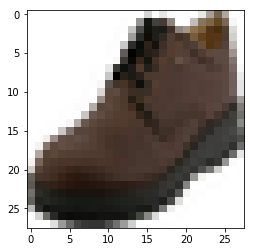

In [117]:
test= X_test[7]
plt.imshow(query, cmap='gray')

#### Get vectors for test image and all images in test set

In [118]:
vectors = encoder.predict(X_test)

In [119]:
test_vectors = encoder.predict(test.reshape(1,28,28,3))

#### Get nearest neighbours for test image vector from set of all image vectors in test set

In [120]:
from sklearn.neighbors import NearestNeighbors

In [121]:
n_neigh = 10

In [122]:
vectors  = vectors .reshape(-1, 4*4*1); print(vectors.shape)
test_vectors = test_vectors.reshape(1, 4*4*1); print(test_vectors.shape)

(12000, 16)
(1, 16)


In [123]:
nbrs = NearestNeighbors(n_neighbors=n_neigh).fit(vectors)

In [124]:
distances, indices = nbrs.kneighbors(np.array(test_vectors))

In [125]:
closest_images = X_test[indices]

In [126]:
closest_images = closest_images.reshape(-1,28,28,3); 
print(closest_images.shape)

(10, 28, 28, 3)


#### Test image

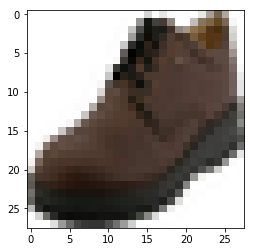

In [127]:
plt.imshow(test, cmap='gray')

#### Nearest neighbours of test image

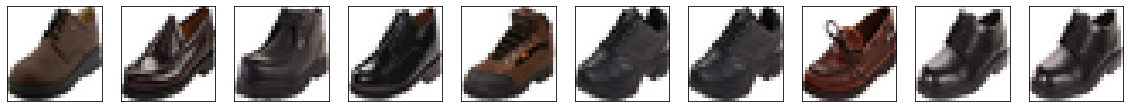

In [128]:

plt.figure(figsize=(20, 6))
for i in range(n_neigh):
    ax = plt.subplot(1, n_neigh, i+1)
    plt.imshow(closest_images[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

#### Result: The closest images obtained are very similar to test image

#### Save the model

In [115]:
encoder.save('encoder2.h5')